<a href="https://colab.research.google.com/github/Muhammadsulton1/ML/blob/main/ML_gens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LassoCV,RidgeCV
from sklearn.metrics import mean_squared_error,r2_score, classification_report

In [ ]:
genes = pd.read_table("/content/selected-genes-meta.tsv")
genes.head()

,Unnamed: 0,gene_id,gene_name
0,0,SLC18A1,vMAT1
1,1,SLC18A2,vMAT2
2,2,SLC17A9,vNuT
3,3,SLC17A7,vGlut1
4,4,SLC17A6,vGlut2


In [ ]:
expression = scipy.io.mmread('/content/selected-genes.mtx')
expression = expression.todense()

In [ ]:
meta = pd.read_table("/content/metadata_human_cells.tsv")
meta = meta.reset_index()

In [ ]:
all_neuronal_lineages = ['neuroepithelial-like cells',
                         'ectodermal/neuroectodermal-like cells',
                         'midbrain/hindbrain cells',
                         'ventral progenitors and neurons 3',
                         'cortical neurons 1',
                         'cycling dorsal progenitors',
                         'ventral progenitors and neurons 2',
                         'IPs and early cortical neurons',
                         'cycling ventral progenitors',
                         'cortical neurons 2',
                         'ventral progenitors and neurons 1',
                         'stem cells 2',
                         'stem cells 1',
                         'stem cells 3'                         
                         ]

In [ ]:
all_neuronal_indexes = meta.index[meta['cl_FullLineage'].isin(all_neuronal_lineages)]

In [ ]:
my_lines = ['409b2']
my_genes = ['Synapsin1']

In [ ]:
stages_cells = []
for s in ['Organoid-4M']:
    i = meta.index[meta['Stage'] == s]
    stages_cells.append(i)

In [ ]:
# Индекс целевого гена:
target_gene_index = genes[genes['gene_name'].isin(my_genes)].index

In [ ]:
# Индексы нужной линии и нужной стадии:
lines_indexes = meta.index[meta['Line'].isin(my_lines)]
stages_indexes = meta.index[meta['Stage'].isin(['Organoid-4M'])]

In [ ]:
#Индексы клеток нейронов:
neuronal_indexes = meta.index[meta['cl_FullLineage'].isin(all_neuronal_lineages)]

In [ ]:
# Полная матрица экспрессий, удовлетворяющая условиям задачи (75 генов):
matrix = expression[0:expression.shape[0], stages_indexes.intersection(neuronal_indexes).intersection(lines_indexes)]

In [ ]:
matrix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
# Целевые значения (целевой ген):
target = matrix[target_gene_index, ]

In [ ]:
target

matrix([[0, 0, 1, ..., 0, 1, 0]])

In [ ]:
# Признаковые значения (остальные гены):
features = np.delete(matrix, target_gene_index, axis=0)

In [ ]:
X = features.T
y = target.T

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


#Lasso regression

In [ ]:
lasso = LassoCV(random_state=17)
model_lasso = lasso.fit(X_train,y_train)
pred_lasso = model_lasso.predict(X_test)
print("rmse:{}".format(np.sqrt(mean_squared_error(y_test,pred_lasso))))
print("r2_score:{}".format(r2_score(y_test,pred_lasso)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1572: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rmse:0.5627632051631107
r2_score:0.20342498094308703


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


#Ridge regression

In [ ]:
ridge = Ridge(alpha=0.1)
model_ridge = lasso.fit(X_train,y_train)
pred_ridge = model_ridge.predict(X_test)
print("rmse:{}".format(np.sqrt(mean_squared_error(y_test,pred_ridge))))
print("r2_score:{}".format(r2_score(y_test,pred_ridge)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1572: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rmse:0.5627632051631107
r2_score:0.20342498094308703


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


#linear regression

In [ ]:
lin = LinearRegression()
model_lin = lin.fit(X_train,y_train)
pred_lin = model_lin.predict(X_test)
print("rmse:{}".format(np.sqrt(mean_squared_error(y_test,pred_lin))))
print("r2_score:{}".format(r2_score(y_test,pred_lin)))

rmse:0.5889972219949429
r2_score:0.12742696765244932


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


#коэффициенты модели

In [ ]:
lin.coef_

array([[ 6.45158336e-02,  5.25813158e-01, -1.05857411e+12,
         1.62737253e-01,  2.26631467e-01, -5.01010280e-01,
         1.01926715e-01,  3.33354782e-03,  7.86381646e-02,
         1.50286894e-02, -1.32743065e-01, -2.11942573e-02,
        -1.38781224e-01,  4.83415223e-01, -9.05726199e+09,
        -9.55788094e+09,  2.55783165e-03,  2.54281626e-01,
        -2.04867025e-01, -2.49020927e-02, -8.81491358e-02,
        -3.09083635e-02,  7.87117271e-02,  1.21063172e+00,
        -5.40901578e-01, -1.05714238e-01, -5.39059650e-02,
         3.70590283e-01,  9.38817294e-02, -1.87770646e-02,
         5.72246050e-02,  7.23397910e-01, -2.38869711e-02,
         1.87915802e-01,  2.09550858e-01,  2.56530762e-01,
         1.91452026e-01, -3.47076416e-01,  2.05444336e-01,
         1.65710449e-02,  4.40856934e-01, -1.60522461e-02,
         1.45324707e-01,  3.71818542e-01,  3.80790710e-01,
         3.60809326e-01,  4.71757173e+03,  1.20452881e-01,
         5.76014572e+03,  2.09735107e+00, -4.60571803e+0

#Регрессия на pytorch

In [ ]:
import torch
from torch.autograd import Variable

In [ ]:
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [ ]:
class RegressionNet(torch.nn.Module):
    def __init__(self, input, output):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(input, 74)
        self.act = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(74,output)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        return x

In [ ]:
epochs = 100

model = RegressionNet(74, 1)

In [ ]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
for epoch in range(epochs):
    inputs = X_train.float()
    labels = y_train.float()

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(0.5022, grad_fn=<MseLossBackward0>)
epoch 0, loss 0.5021981000900269
tensor(0.5001, grad_fn=<MseLossBackward0>)
epoch 1, loss 0.5001422166824341
tensor(0.4981, grad_fn=<MseLossBackward0>)
epoch 2, loss 0.4981229603290558
tensor(0.4961, grad_fn=<MseLossBackward0>)
epoch 3, loss 0.49614083766937256
tensor(0.4942, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.49419647455215454
tensor(0.4923, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.4922904372215271
tensor(0.4904, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.49042314291000366
tensor(0.4886, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.48859506845474243
tensor(0.4868, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.4868066608905792
tensor(0.4851, grad_fn=<MseLossBackward0>)
epoch 9, loss 0.4850582778453827
tensor(0.4834, grad_fn=<MseLossBackward0>)
epoch 10, loss 0.48335012793540955
tensor(0.4817, grad_fn=<MseLossBackward0>)
epoch 11, loss 0.4816826283931732
tensor(0.4801, grad_fn=<MseLossBackward0>)
epoch 12, loss 0.48005589842796326
ten

In [ ]:
with torch.no_grad(): # we don't need gradients in the testing phase
  predicted = model(X_test.float())
print(predicted)

tensor([[0.3314],
        [0.3028],
        [0.2939],
        [0.2897],
        [0.3121],
        [0.3168],
        [0.3015],
        [0.2950],
        [0.3078],
        [0.3006],
        [0.2869],
        [0.3259],
        [0.2965],
        [0.3071],
        [0.3385],
        [0.2941],
        [0.2937],
        [0.3318],
        [0.2983],
        [0.2942],
        [0.3411],
        [0.3305],
        [0.2906],
        [0.3149],
        [0.2996],
        [0.3296],
        [0.3571],
        [0.3254],
        [0.3369],
        [0.3292],
        [0.3128],
        [0.2861],
        [0.2907],
        [0.3170],
        [0.3123],
        [0.2957],
        [0.3618],
        [0.2989],
        [0.3174],
        [0.3508],
        [0.3409],
        [0.3171],
        [0.2939],
        [0.3089],
        [0.2953],
        [0.2903],
        [0.3448],
        [0.2971],
        [0.3108],
        [0.3177],
        [0.3209],
        [0.3018],
        [0.3194],
        [0.2986],
        [0.2997],
        [0

In [ ]:
print("r2 score:",r2_score(y_test,predicted))
print("rmse:", np.sqrt(mean_squared_error(y_test,predicted)))

r2 score: 0.020423750117542272
rmse: 0.6240673714230922


#классификация 

In [ ]:
meta.head()

,index,Species,Stage,Line,Sample,Barcode,PredCellType,nGene,nUMI,PercentMito,in_FullLineage,in_LineComp,in_DE,pseudocellIdx_FullLineage,pseudocellIdx_LineComp,pseudocellIdx_DE,cl_FullLineage,cl_LineComp
0,EC00001,human,iPSCs,409b2,h409B2_iPSCs,AAACCTGAGACACTAA-1,IPC,1885,5650,0.059292,True,False,False,12361.0,NaN,NaN,stem cells 2,NaN
1,EC00004,human,iPSCs,409b2,h409B2_iPSCs,AAACCTGCACCACCAG-1,IPC,4185,18053,0.052678,True,False,False,12171.0,NaN,NaN,stem cells 2,NaN
2,EC00005,human,iPSCs,409b2,h409B2_iPSCs,AAACCTGCACGGTTTA-1,IPC,3018,11332,0.028592,True,False,False,12362.0,NaN,NaN,stem cells 2,NaN
3,EC00006,human,iPSCs,H9,H9_iPSCs,AAACCTGCACTGAAGG-1,IPC,3198,12563,0.060097,True,False,False,5533.0,NaN,NaN,stem cells 2,NaN
4,EC00007,human,iPSCs,409b2,h409B2_iPSCs,AAACCTGCAGTGAGTG-1,RG,5301,29534,0.050755,True,False,False,12437.0,NaN,NaN,stem cells 1,NaN


In [ ]:
stages = meta['Stage'].unique()
for i in range(len(stages)):
    print('stage: ', stages[i])

stage:  iPSCs
stage:  EB
stage:  Neuroectoderm
stage:  Neuroepithelium
stage:  Organoid-1M
stage:  Organoid-2M
stage:  Organoid-4M


In [ ]:
stages_cells = []
for s in stages:
    i = meta.index[meta['Stage'] == s]
    stages_cells.append(i)

In [ ]:
my_line = '409b2'

In [ ]:
intrested_indexes = meta.index[meta['Line'] == my_line]
matrix = expression[:, intrested_indexes]
matrix.shape

(75, 24983)

In [ ]:
targets = meta[meta['Line'] == my_line]['Stage']
print('target shape: ', targets.shape, '\n')
targets.tail()

target shape:  (24983,) 



68638    Organoid-4M
68639    Organoid-4M
68640    Organoid-4M
68641    Organoid-4M
68642    Organoid-4M
Name: Stage, dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler
X = matrix.T
y = targets.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
clf = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train)

In [ ]:
preds = clf.predict(X_test)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,10)

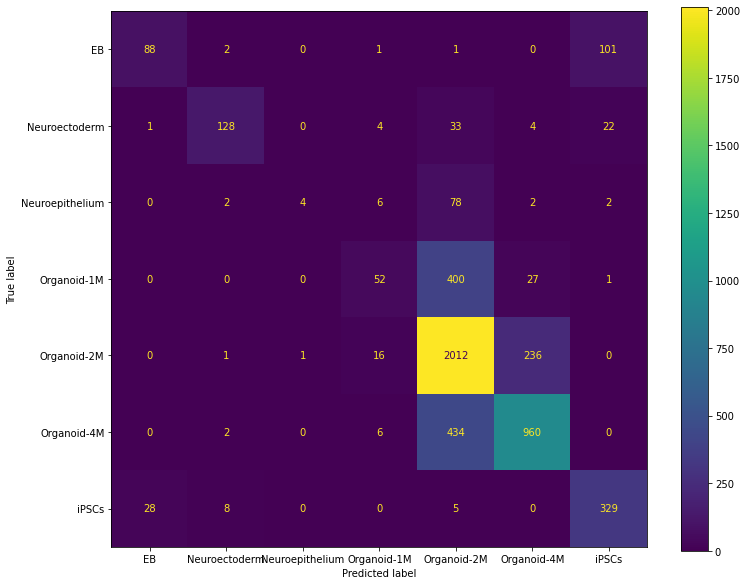

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

#голосовоние 

In [ ]:
log_iPSCs = LogisticRegression(random_state=42)
log_EB = LogisticRegression(random_state=42)
log_Neuroectoderm = LogisticRegression(random_state=42)
log_Neuroepithelium = LogisticRegression(random_state=42)
log_Organoid_1M = LogisticRegression(random_state=42)
log_Organoid_2M = LogisticRegression(random_state=42)
log_Organoid_4M = LogisticRegression(random_state=42)

models = []
models.append(log_iPSCs)
models.append(log_EB)
models.append(log_Neuroectoderm)
models.append(log_Neuroepithelium)
models.append(log_Organoid_1M)
models.append(log_Organoid_2M)
models.append(log_Organoid_4M)

In [ ]:
fitted_models = {}
for stage, model in zip(stages, models):
    y_train_ = y_train.copy()
    y_test_ = y_test.copy()

    y_train_[y_train_ != stage] = 0
    y_train_[y_train_ == stage] = 1
    y_test_[y_test_ != stage] = 0
    y_test_[y_test_ == stage] = 1

    y_train_ = np.array(y_train_).astype('int')
    y_test_ = np.array(y_test_).astype('int')

    model = model.fit(X_train, y_train_)
    preds = model.predict(X_test)
    preds_proba = model.predict_proba(X_test)

    print(f'{stage} ROC_AUC: ', round(roc_auc_score(y_test_, preds), 3))  
      
    fitted_models[stage] = {'model': model,
                            'predicts_proba': preds_proba}

iPSCs ROC_AUC:  0.755
EB ROC_AUC:  0.741
Neuroectoderm ROC_AUC:  0.745
Neuroepithelium ROC_AUC:  0.526
Organoid-1M ROC_AUC:  0.553
Organoid-2M ROC_AUC:  0.755
Organoid-4M ROC_AUC:  0.792
